## MLE and MAP

In [336]:
import numpy as np
import matplotlib.pyplot as plt

In [473]:
n = 100
deg = 3
x_train = np.sort(np.random.uniform(-100,100,size=[n,1]))
x_test = np.sort(np.random.uniform(-120,120,size=[n,1]))
noise = 20*np.random.normal(loc=0,scale=1.0,size=[n,1])
power = np.arange(deg)
theta = np.random.uniform(-.1,.1,[deg,1])
X_train = np.tile(x_train, deg)
X_test = np.tile(x_test, deg)
X_train = np.power(X_train, power)
X_test = np.power(X_test, power)
y_train = np.matmul(X_train, theta) + noise
y_test = np.matmul(X_test, theta)

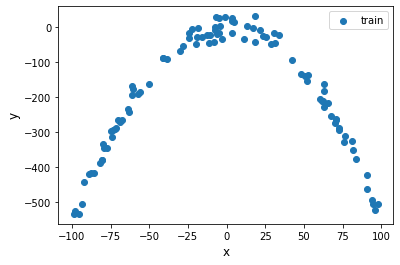

In [474]:
fig, ax = plt.subplots()
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(x_train, y_train, label='train')
ax.legend()
plt.show()

In [475]:
s = np.linalg.inv(np.matmul(np.transpose(X_train),X_train))
s = np.matmul(s,np.transpose(X_train)) 
theta_ml = np.matmul(s,y_train)
print(np.reshape(theta,[1,-1]), "vs\n", np.reshape(theta_ml,[1,-1]))

[[ 0.07005097  0.07883533 -0.05463845]] vs
 [[ 1.4501596   0.08159768 -0.05487524]]


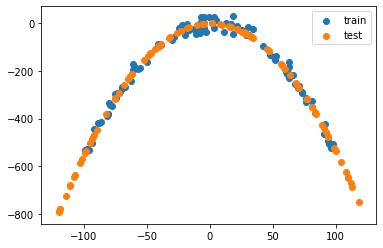

In [476]:
y_test_ml = np.matmul(X_test, theta_ml)
fig, ax = plt.subplots()
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
ax.legend()
plt.show()

In [477]:
s = np.matmul(np.transpose(X_train),X_train)
reg = np.identity(s.shape[0])
s = np.linalg.inv(s + reg)
s = np.matmul(s,np.transpose(X_train)) 
theta_map = np.matmul(s,y_train)
print("GT: ", np.reshape(theta,[1,-1]), "\nML: ", np.reshape(theta_ml,[1,-1]))
print("MAP:", np.reshape(theta_map,[1,-1]))

GT:  [[ 0.07005097  0.07883533 -0.05463845]] 
ML:  [[ 1.4501596   0.08159768 -0.05487524]]
MAP: [[ 1.41735778  0.08160129 -0.0548699 ]]


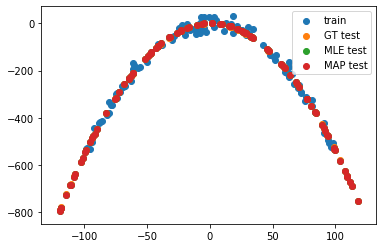

In [478]:
y_test_map = np.matmul(X_test, theta_map)
fig, ax = plt.subplots()
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='GT test')
plt.scatter(x_test, y_test_ml, label='MLE test')
plt.scatter(x_test, y_test_map, label='MAP test')
ax.legend()
plt.show()

In [479]:
ml_error = ((y_test_ml - y_test)**2).mean()
map_error = ((y_test_map - y_test)**2).mean()
print("ML Error:  ",  ml_error)
print("MAP Error: ",  map_error)

ML Error:   1.2348181860406147
MAP Error:  1.1820725078978713
